<a href="https://colab.research.google.com/github/NatyEsquenazi/Data-Visualization/blob/main/Clase_1_tidyverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('gapminder')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Comenzando con R 



## Introducción simple al `tidyverse`
La idea de esta notebook es poder introducir algunos conceptos básicos del llamado tidyverse en R. 
Vamos a tratar de hacernos amigos de algunos conceptos y "verbos" que nos van a hacer  la vida más fácil en la manipulación de datos.

## Objetivos
- Brindar nociones sobre la lógica general del tidyverse para el preprocesamiento de datos
- Introducir algunas funciones básicas para el filtrado, trasformación y merge de datos

## Explorando algunos datos
Vamos a trabajar con un set de datos precargado en R que se llama gapminder. Está basado en la información que puede recolectarse de [este sitio](https://www.gapminder.org/).

La fundación Gapminder es una organización sin fines de lucro con sede en Suecia que promueve el desarrollo global mediante el uso de estadísticas que pueden ayudar a reducir mitos comunes e historias sensasionalistas sobre la salud y la economía mundial. Una selección importante de datos ya está cargada en la librería dslabs en el data frame gapminder.

Al cargar la librería se carga automáticamente el dataset y con `head()` podemos ver las primeras filas del dataset.

In [ ]:
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [ ]:
tail(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


Tenemos ahora un objeto (que es una tabla, algo parecido a una hoja de Excel o a una base de SPSS o de Stata) que se llama `gapminder`.



---
1. ¿Qué datos parece tener esta tabla?
2. ¿Cuáles son las variables? ¿Cuáles las unidades de análisis?
---

Podemos ver más en detalle las características del dataset de la siguente forma:

In [ ]:
str(gapminder)

tibble[,6] [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


Aquí, aplicamos la función `str()` y le pasamos como argumento el objeto `gapminder`. Nos devolvió la estructura de ese objeto.

Una forma equivalente de llegar a este resultado seria

In [ ]:
gapminder %>% str()

tibble[,6] [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


Ya lo vamos a ver en detalle, pero vean ese operador `%>%` que se llama "pipe". Lo que hace es tomar lo que está a la izquierda (en este caso `gapminder`) y lo pasa como input de lo que está a la derecha (en este caso, `str()`).

---
Ahora, traten de obtener las primeras filas del dataset (con la función `head()` usando el `%>%`.

In [ ]:
### Completar acá

---


## Tres de los cinco verbos del `tidyverse`

Ahora bien, en general, vamos a querer operar sobre cualquier dataset, tabla, o base que caiga en nuestras manos. Vamos a querer filtrar filas, seleccionar columnas, ordenar filas, crear o cambiar variables y generar agregados de esos datos. 

Para hacer todo esto, y mucho más, vamos a ir aprendiendo algunas funciones que representan cinco verbos básicos para la transformación de datos:

* `select()`: seleccionar -elegir- columnas por su nombre
* `filter()`: filtrar, es decir quedarse sólo con las filas que cumplan cierta condición
* `summarise()`: producir sumarios -un valor extraído de muchos, por ejemplo el promedio- con el contenido de las columnas
* `arrange()`: ordenar las filas de acuerdo a su contenido o algún otro índice
* `mutate()`: mutar -cambiar- un dataframe, modificando el contenido de sus columnas o creando columnas (es decir, variables) nuevas

Estas funciones tienen una sintaxis, una forma de escribirse, uniforme. El primer argumento que toman siempre es un dataframe; los siguientes indican qué hacer con los datos. El resultado siempre es un nuevo dataframe.

Las funciones son parte de dplyr, uno de los componentes de la familia de paquetes Tidyverse. Ya tenemos disponible todo lo necesario, activado cuando invocamos library(tidiverse) al comienzo.



### Filtrando filas: `filter()`

Vamos a generar una tabla nueva con todos los registros que correspondan a Argentina.

In [ ]:
argentina <- filter(gapminder, country=='Argentina')

¿Qué pasó acá? Vamos de derecha a izquierda.

- `filter(gapminder, country=='Argentina')`: Usamos la función `filter` y le pasamos como argumentos el dataset original (`gapminder`) y la condición que tiene que cumplir las filas con las que nos queremos quedar
- `argentina <-`: este paso es clave. Lo que hicimos aquí fue asignar los resultados de la función filter a un objeto tabla nuevo al que llamamos `argentina`

Veamos las primeras filas:

In [ ]:
head(argentina)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1952,62.485,17876956,5911.315
Argentina,Americas,1957,64.399,19610538,6856.856
Argentina,Americas,1962,65.142,21283783,7133.166
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027


Si no realizábamos el paso `argentina <-` el resultado del filtrado no iba a quedar en ningún lado. Veamos otro ejemplo.

In [ ]:
filter(gapminder, country=='Peru')

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Peru,Americas,1952,43.902,8025700,3758.523
Peru,Americas,1957,46.263,9146100,4245.257
Peru,Americas,1962,49.096,10516500,4957.038
Peru,Americas,1967,51.445,12132200,5788.093
Peru,Americas,1972,55.448,13954700,5937.827
Peru,Americas,1977,58.447,15990099,6281.291
Peru,Americas,1982,61.406,18125129,6434.502
Peru,Americas,1987,64.134,20195924,6360.943
Peru,Americas,1992,66.458,22430449,4446.381


El filtro funcionó... ¿pero dónde quedaron los datos? En ningún lado porque no los asigné a ningún objeto.


---
Repitan el filtro pero asignándolo a un objeto que se llame `peru`:

In [ ]:
### Completar acá

---

Con filter podemos hacer todos los filtros que querramos incluso con condiciones más complicadas:

In [ ]:
test <- filter(gapminder, continent=='Americas' & lifeExp > 70 & year==2007)

¿Qué debería devolver este código?

---

In [ ]:
### Completar acá

---

### Seleccionando columnas: `select`

Otra operación habitual es querer quedarse con algunas columnas. Para ello usamos `select`:

In [ ]:
gdp <- select(gapminder, gdpPercap)
head(gdp)

gdpPercap
<dbl>
779.4453
820.8530
853.1007
836.1971
739.9811
786.1134


También podemos seleccionar varias columnas.

¿Cuál se les ocurre que puede ser la diferencia entre instrucciones? ¿Qué resultado devolverá cada una?

In [ ]:
varias <- select(gapminder, country, lifeExp)

In [ ]:
varias2 <- select(gapminder, country:lifeExp)

También podemos hacer selecciones de columnas basadas en el texto de las columnas, por ejemplo, todas las columnas que empiezan o terminan con determinada frase o letra. Para ello usamos `starts_with`:

In [ ]:
varias3 <- select(gapminder, starts_with('c'))
head(varias3)

También podemos eliminar columnas anteponiendo el operador `-`:

In [ ]:
varias4 <- select(gapminder, -country)
head(varias4)

continent,year,lifeExp,pop,gdpPercap
<fct>,<int>,<dbl>,<int>,<dbl>
Asia,1952,28.801,8425333,779.4453
Asia,1957,30.332,9240934,820.8530
Asia,1962,31.997,10267083,853.1007
Asia,1967,34.020,11537966,836.1971
Asia,1972,36.088,13079460,739.9811
Asia,1977,38.438,14880372,786.1134


Hay muchísimas otras opciones para hacer selecciones y filtros. 
Pueden consultar la documentación de cada una de las funciones:

- [`filter()`](https://dplyr.tidyverse.org/reference/filter.html)
- [`select()`](https://dplyr.tidyverse.org/reference/select.html)


### Calculando métricas agregadas: `group_by()`, `summarise()` y `arrange()`
Bien, vamos a complejizar un poco la cosa. Supongamos que ahora queremos trabajar con todo el dataset de gapminder y queremos calcular la esperanza de vida promedio de todo el mundo por continente durante el año 2007.

Entran a la cancha varias funciones:

In [ ]:
gap2007 <- filter(gapminder, year==2007)
groups <- group_by(gap2007, continent)
aggs <- summarise(groups, media_exp = mean(lifeExp))
aggs <- arrange(aggs, media_exp)
aggs

continent,media_exp
<fct>,<dbl>
Africa,54.80604
Asia,70.72848
Americas,73.60812
Europe,77.64860
Oceania,80.71950


Ok. Acá pasaron varias cosas que tenemos que revisar tranquiles...

* `gap2007 <- filter(gapminder, year==2007)` => acá filtramos los registros correspondientes al año 2007 y los guardamos en un objeto llamado `gap2007`
* `groups <- group_by(gap2007, continent)` => generamos un objeto nuevo usando la función `gruop_by()`; y le dijimos, "tomá los registros del año 2007 (`gap2007`) y agrupalos por la variable `continent`.

Pero hasta ese momento, solamente generamos una agrupamiento. No hicimos ningún cálculo sobre esos grupos agregados. Allí entra la última línea:

* `aggs <- summarise(groups, media_exp = mean(lifeExp))` => le dijimos "Tomá el agrupamiento (`groups`) y calculá la media para la variable `lifeExp`, guardala en una variable que se llame `media_exp` y guardá todo en un objeto que se llame `aggs`.

* `aggs <- arrange(aggs, media_exp)` => por último, le pedimos que nos deje ordenado el objeto `aggs` en función de la variable `media_exp` de forma ascendente (y ya que estamos, metimos otra función...

---
¿Cuántas filas tiene `aggs`? ¿Y cuántas columnas? ¿Por qué?

---

## Usando los pipes `%>%`

Nos queda pendiente un verbo... `mutate()` pero vamos a dejarlo para más adelante. Antes de terminar, vamos a presentar una herramienta más: el operador pipe (pronúnciese “paip”, es el término en inglés que significa “tubo”).

El pipe es un operador: un símbolo que relaciona dos entidades. Dicho en forma más simple, el pipe de R, cuyo símbolo es `%>%` está en familia con otros operadores más convencionales, como +, - o /. 

Y al igual que los otros operadores, entrega un resultado en base a los operandos que recibe. Ahora bien… ¿Para qué sirve? En resumidas cuentas, hace que el código necesario para realizar una serie de operaciones de transformación de datos sea mucho más simple de escribir y de interpretar.

Repasemos la secuencia anterior…

1. Filtramos registros
2. Generamos un agrupamiento 
3. Generamos un resumen
4. Ordenamos en forma descendente

Un problema del ejemplo anterior es que hemos generado unos cuantos objetos (`gap2007` , `groups` y  `aggs`) que probablemente no volveremos a usar. Además de ser inútiles una vez obtenido el resultado buscado, estas variables intermedias requieren que las nombremos. Decidir el nombre de estas variables que no nos importan toma tiempo (sobre todo cuando producimos muchas), y nos distrae de lo importante, que es el análisis.

El pipe,` %>%` que vimos más arriba, permite encadenar operaciones, conectando el resultado de una como el dato de entrada de la siguiente. La misma secuencia que realizamos antes puede resolverse con pipes, quedando así:

In [ ]:
gapminder %>%
  filter(year==2007) %>%
  group_by(continent) %>%
  summarise(mean_exp = mean(lifeExp)) %>%
  arrange(mean_exp)

continent,mean_exp
<fct>,<dbl>
Africa,54.80604
Asia,70.72848
Americas,73.60812
Europe,77.64860
Oceania,80.71950


Fíjense que es mucho más linda y clara la sintaxis. Cada renglón genera un .output que es el input del renglón siguiente encadenado con los `%>%`. Esa tabla que sale del código anterior puede ser el input de un gráfico:

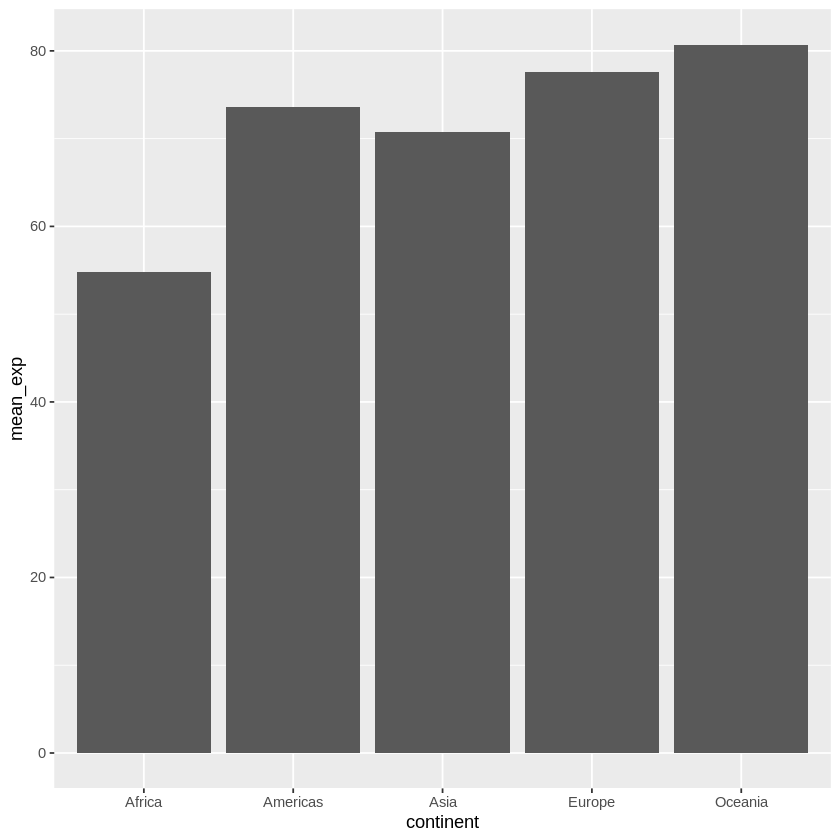

In [ ]:
gapminder %>%
  filter(year==2007) %>%
  group_by(continent) %>%
  summarise(mean_exp = mean(lifeExp)) %>%
  arrange(mean_exp) %>%
  ggplot() + 
    geom_bar(aes(x=continent, y=mean_exp), stat='identity')

Pero sobre eso vamos a trabaja la clase que viene... 

Mientras tanto, les dejamos algunas consignas para ir practicando estas cosas en casa. La idea es que los resuelvan usando los `%>%` porque son muy útiles para todo lo que vamos a estar en el resto del seminario. Vamos a discutirlos los primeros 20 minutos de la clase que viene.

Las preguntas tienen cierto grado de ambigüedad porque queremos simular el proceso de pasar de una pregunta "conceptual" o "abstracta" a su operacionalización en código.


## Ejercicios a resolver

1. ¿Cuáles son los países con mayor PBI per cápita promedio a lo largo de todo el período? 

In [ ]:
gapminder %>%
  group_by(country) %>%
  summarise(mean_pbi = mean(gdpPercap)) %>%
  arrange(desc(mean_pbi)) %>%
  head()


country,mean_pbi
<fct>,<dbl>
Kuwait,65332.91
Switzerland,27074.33
Norway,26747.31
United States,26261.15
Canada,22410.75
Netherlands,21748.85


2. ¿Cómo es la evolución de la expectativa de vida en Argentina?

In [ ]:
gapminder %>%
filter(country == 'Argentina') %>%
select(country, year, lifeExp)%>%
group_by(year)

In [ ]:
str(gapminder)

tibble[,6] [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


3. ¿Cómo es la evolución de la población total por continente?

In [ ]:
gapminder %>%
select(continent, year, pop)%>%
group_by(year, continent)%>%
summarise(pop_total = sum(pop))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,continent,pop_total
<int>,<fct>,<dbl>
1952,Africa,237640501
1952,Americas,345152446
1952,Asia,1395357351
1952,Europe,418120846
1952,Oceania,10686006
1957,Africa,264837738
1957,Americas,386953916
1957,Asia,1562780599
1957,Europe,437890351
